<a href="https://colab.research.google.com/github/Gaurav9693089415/Data-Science-Assignment-/blob/main/XGBM_and_LGBM_Assignment_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA):

1.	Load the Titanic dataset using Python's pandas library.

2.	Check for missing values.

3.	Explore data distributions using histograms and box plots.

4.	Visualize relationships between features and survival using scatter plots and bar plots.


In [76]:
import pandas as pd

In [77]:
dftr=pd.read_csv('Titanic_train.csv')  ## dftr=Titanic train
dfts=pd.read_csv('Titanic_test.csv')   ##dfts=Titanic Test

In [78]:
dftr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Removing  unnecessary columns from  both traing and testing dataset


In [79]:
dftr.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)

In [80]:
dfts.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)

In [81]:
dfts.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.5,0,0,NaN,Q
1,3,female,47.0,1,0,NaN,S
2,2,male,62.0,0,0,NaN,Q
3,3,male,27.0,0,0,NaN,S
4,3,female,22.0,1,1,NaN,S


In [82]:
dftr.size

7128

In [83]:
dftr.shape

(891, 8)

In [84]:
dftr.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [85]:
dftr.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [86]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [87]:
dftr.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Cabin,687
Embarked,2


In [88]:
dfts.shape


(418, 7)

In [89]:
dfts.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.5,0,0,NaN,Q
1,3,female,47.0,1,0,NaN,S
2,2,male,62.0,0,0,NaN,Q
3,3,male,27.0,0,0,NaN,S
4,3,female,22.0,1,1,NaN,S


In [90]:
dfts.columns ## since it is testing data so it has not target column 'Survuved'.

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked'], dtype='object')

In [91]:
dftr.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [92]:
dfts.size

2926

In [93]:
dfts.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Cabin,327
Embarked,0


In [94]:
## checking the data is imbalanced or not
dftr['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

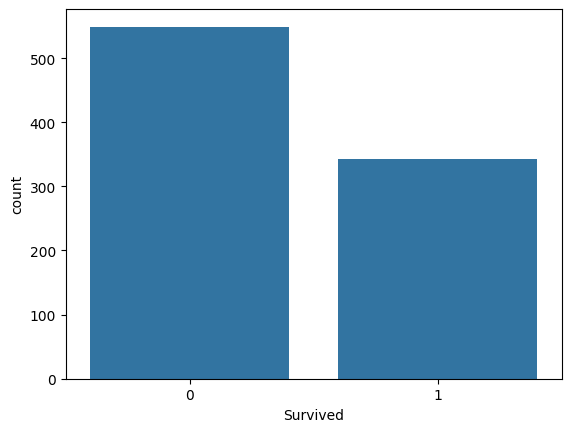

In [95]:
import seaborn as sns
sns.countplot(x='Survived',data=dftr)

Clearly the data is not imbalanced

3.	Explore data distributions using histograms and box plots.

4.	Visualize relationships between features and survival using scatter plots and bar plots


In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

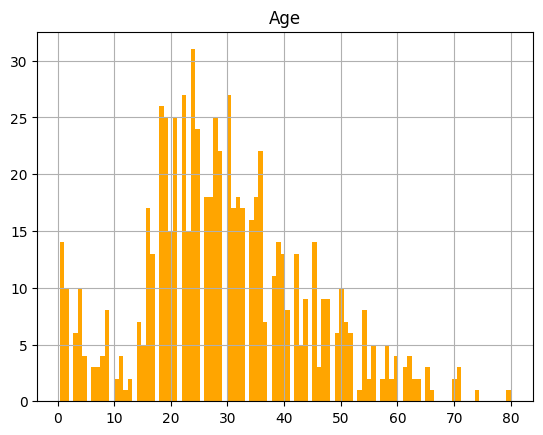

In [97]:
dftr.hist('Age',bins=100,color='orange'); ##

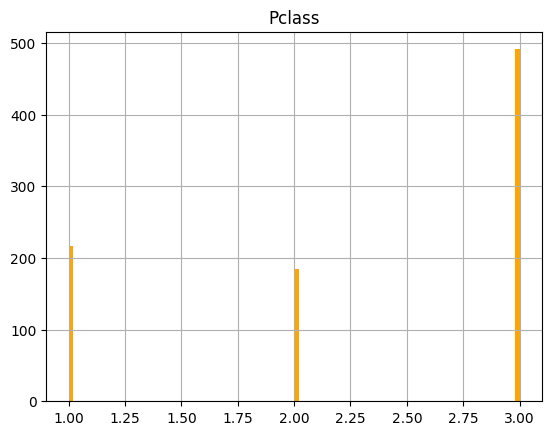

In [98]:
dftr.hist('Pclass',bins=100,color='orange');

In [99]:
dftr.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

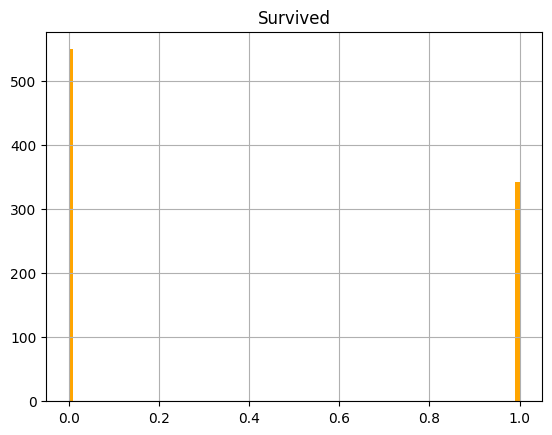

In [100]:
dftr.hist('Survived',bins=100,color='orange')

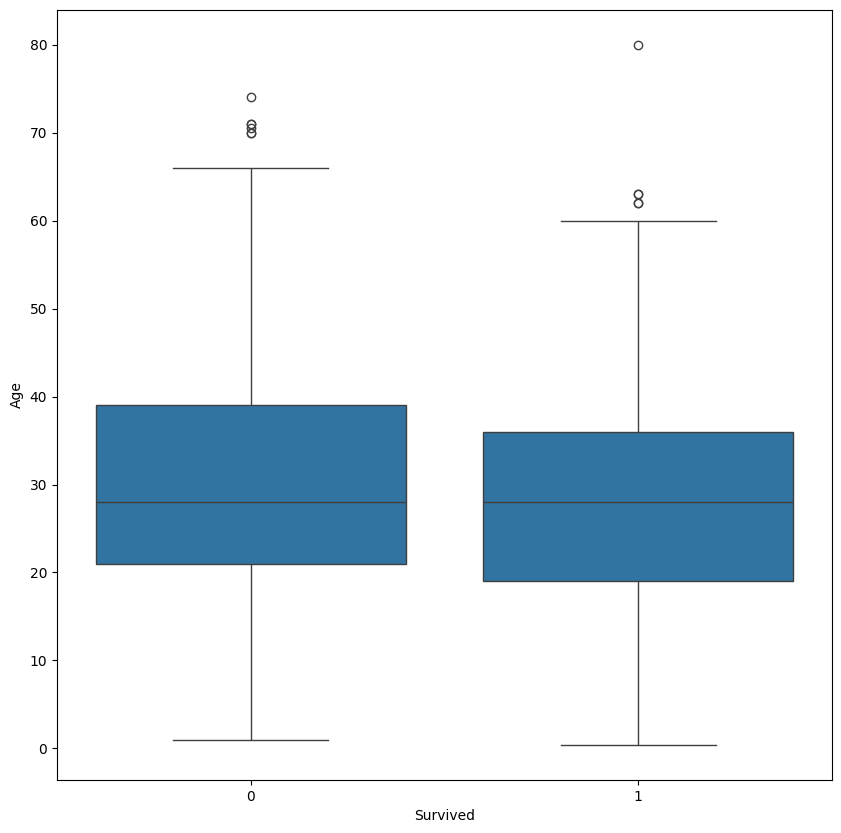

In [101]:
plt.figure(figsize=(10,10));
sns.boxplot(x='Survived',y='Age',data=dftr);

<Axes: xlabel='Pclass', ylabel='count'>

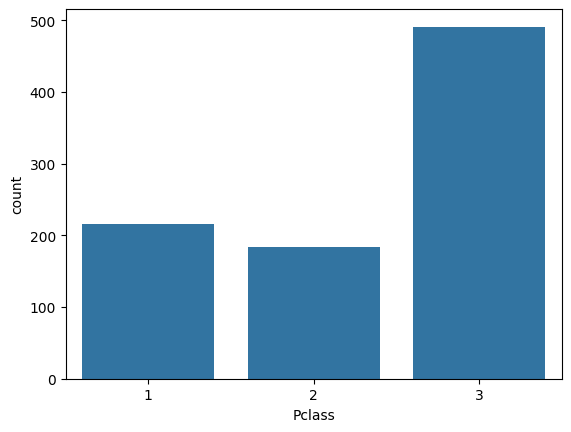

In [102]:
sns.countplot(x='Pclass',data=dftr)

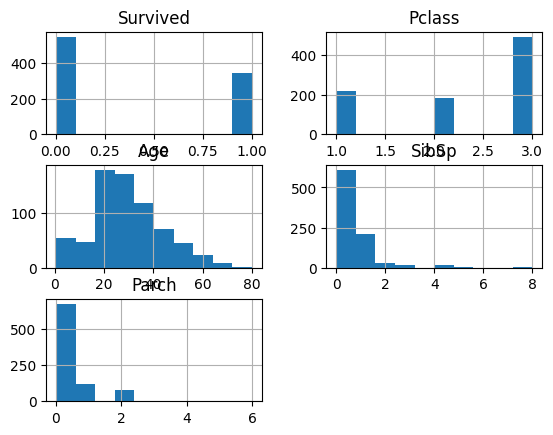

In [103]:
dftr.hist();

In [104]:
dftr.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

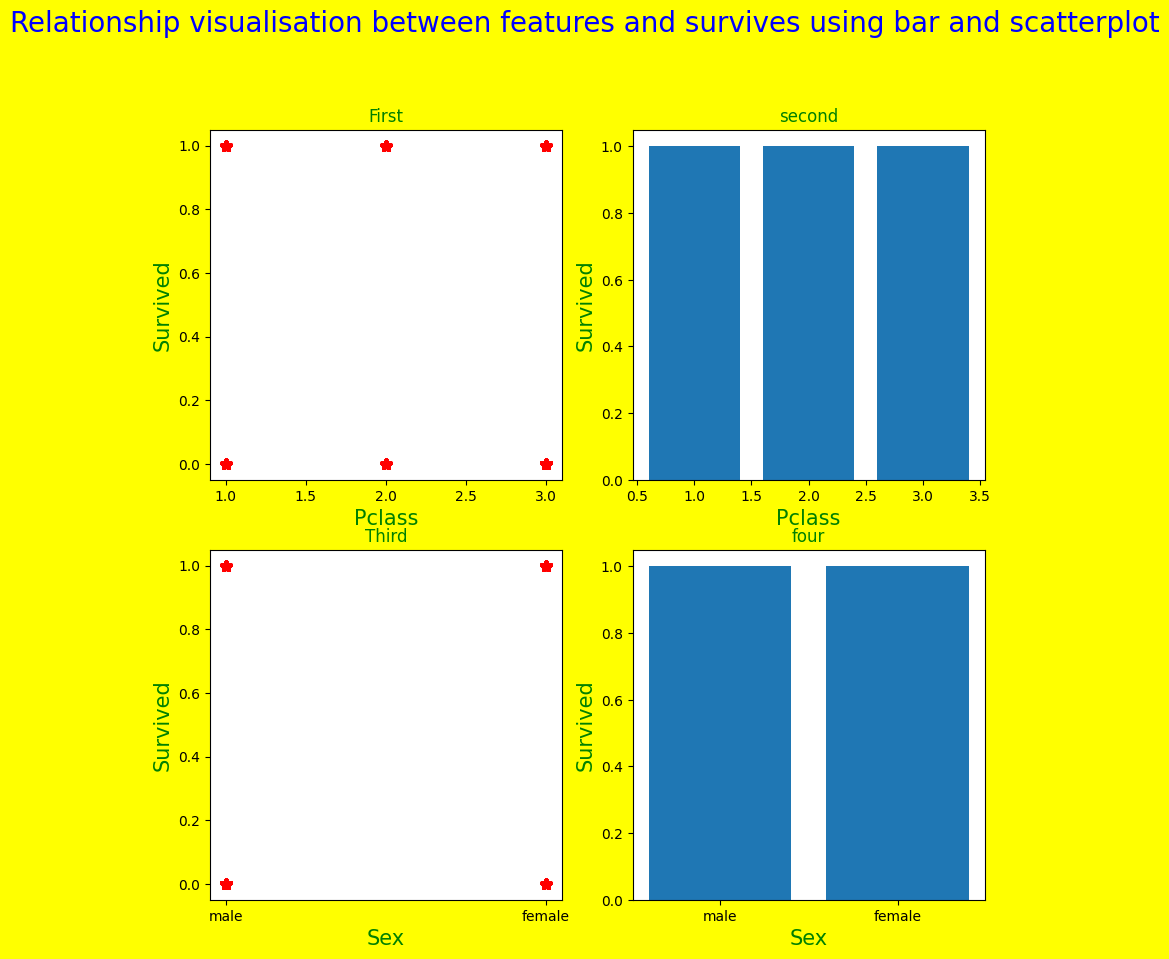

In [105]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,10),facecolor='yellow')
plt.suptitle('Relationship visualisation between features and survives using bar and scatterplot',color='blue',y=(1),size=20)
axs[0,0].scatter(dftr['Pclass'],dftr['Survived'],color='red',marker='*',linewidth=3)
axs[0,0].set_xlabel('Pclass',color='green',size=15)
axs[0,0].set_ylabel('Survived',color='green',size=15)
axs[0,0].set_title('First',y=(1),color='green')
axs[0,1].bar(dftr['Pclass'],dftr['Survived'])
axs[0,1].set_xlabel('Pclass',color='green',size=15)
axs[0,1].set_ylabel('Survived',color='green',size=15)
axs[0,1].set_title('second',y=(1),color='green');
axs[1,0].scatter(dftr['Sex'],dftr['Survived'],color='red',marker='*',linewidth=3)
axs[1,0].set_xlabel('Sex',color='green',size=15)
axs[1,0].set_ylabel('Survived',color='green',size=15)
axs[1,0].set_title('Third',y=(1),color='green')
axs[1,1].bar(dftr['Sex'],dftr['Survived'])
axs[1,1].set_xlabel('Sex',color='green',size=15)
axs[1,1].set_ylabel('Survived',color='green',size=15)
axs[1,1].set_title('four',y=(1),color='green');  ## Similarly we can show for other features


In [106]:
dftr.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

Data Preprocessing:

1.	Impute missing values

2.	Encode categorical variables using one-hot encoding or label encoding.

3.	If needed you can apply more preprocessing methods on the given dataset


In [107]:
dftr.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Cabin,687
Embarked,2


In [108]:
dfts.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Cabin,327
Embarked,0


In [109]:
#filling null values in both training and testing dataset
dftr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [110]:
dftr.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Cabin,687
Embarked,2


In [112]:
dftr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [115]:
## Filling null value in Cabin column

dftr.loc[:, 'Cabin'] = dftr['Cabin'].fillna(dftr['Cabin'].mode()[0])
dfts.loc[:, 'Cabin'] = dfts['Cabin'].fillna(dfts['Cabin'].mode()[0])


In [117]:
## Filling null value in Age column
dftr['Age']=dftr['Age'].fillna(dftr['Age'].mean())
dfts['Age']=dfts['Age'].fillna(dfts['Age'].mean())

In [118]:
dftr.isnull().sum()
dfts.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Cabin,0
Embarked,0


In [119]:
## Cleary we have filled null values

In [120]:
##CHECKING  FOR DUPLICATE VALUES

In [121]:
dftr.duplicated().sum()

264

In [122]:
dfts.duplicated().sum()

104

In [123]:
## removing duplicated values
dftr.drop_duplicates(inplace=True)
dfts.drop_duplicates(inplace=True)

In [125]:
dftr.duplicated().sum()


0

In [126]:
dfts.duplicated().sum()

0

In [ ]:
## Clearly we have removed duplicated values

In [143]:
## Encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()


In [144]:
dftr['Sex']=lab_enc.fit_transform(dftr['Sex'])

In [145]:

dfts['Sex']=lab_enc.fit_transform(dfts['Sex'])

In [146]:

dftr['Cabin']=lab_enc.fit_transform(dftr['Cabin'])
dfts['Cabin']=lab_enc.fit_transform(dfts['Cabin'])

In [147]:
dftr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,0,22.0,1,0,0,S
1,1,1,0,38.0,1,0,0,C
2,1,3,0,26.0,0,0,0,S
3,1,1,0,35.0,1,0,0,S
4,0,3,0,35.0,0,0,0,S


In [ ]:
## Clearly The data is encoded using label_encoder

Building Predictive Models:

1.	Split the preprocessed dataset into training and testing sets.

2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

3.	Build predictive models using LightGBM and XGBoost algorithms.

4.	Train the models on the training set and evaluate their performance on the testing set.

5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
